#### Create a example data set

In [28]:
weight <- c(1,2,5, 6, 4, 7, 8, 10, 11, 13, 12, 15)
price <- c(10,18, 45, 56, 35, 72, 99, 115, 130, 126, 123, 153)
Example_data <- data.frame(weight, price)

#### Explore data

In [29]:
# See the first and last 6 rows of data
head(Example_data); tail(Example_data)

weight,price
1,10
2,18
5,45
6,56
4,35
7,72


,weight,price
7,8,99
8,10,115
9,11,130
10,13,126
11,12,123
12,15,153


In [30]:
# Number of rows and column in data 
nrow(Example_data); ncol(Example_data)

[1] 12

[1] 2

In [31]:
# See structure of data ie: each variable data type, presence of NA. 
str(Example_data)

'data.frame':	12 obs. of  2 variables:
 $ weight: num  1 2 5 6 4 7 8 10 11 13 ...
 $ price : num  10 18 45 56 35 72 99 115 130 126 ...


In [38]:
# See the statistics of each column
summary(Example_data)

     weight           price       
 Min.   : 1.000   Min.   : 10.00  
 1st Qu.: 4.750   1st Qu.: 42.50  
 Median : 7.500   Median : 85.50  
 Mean   : 7.833   Mean   : 81.83  
 3rd Qu.:11.250   3rd Qu.:123.75  
 Max.   :15.000   Max.   :153.00  

In [ ]:
#### Visualize the data using ggplot

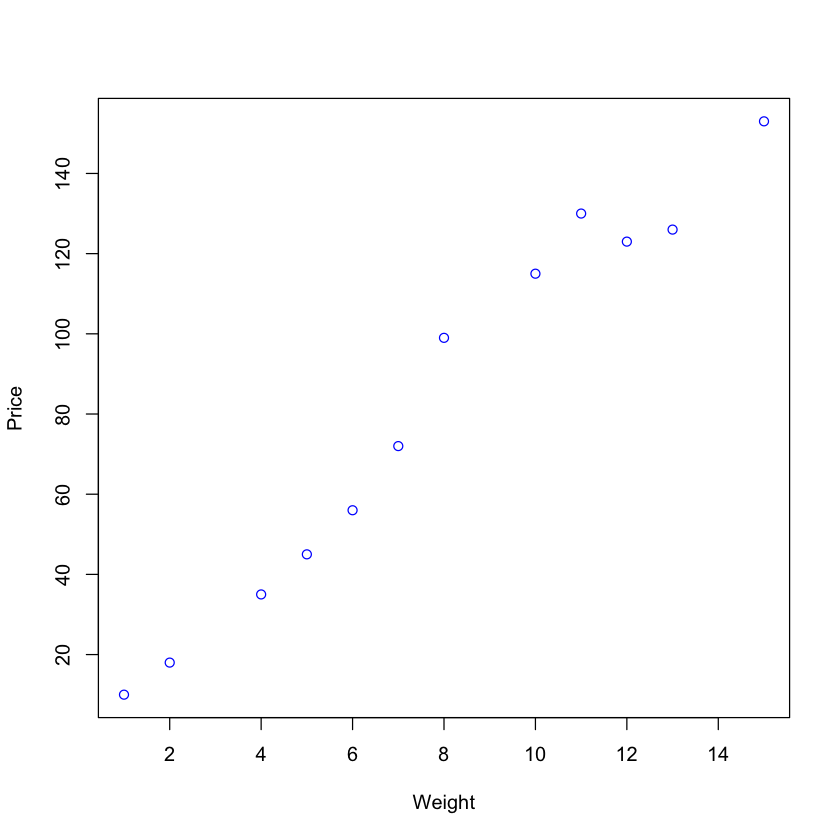

In [44]:
#library(ggplot2)
#ggplot(aes(x= weight, y = price), data = Example_data) + geom_point(color = 'blue')
plot(Example_data$weight, Example_data$price, xlab = "Weight",
     ylab = "Price", col = "blue")

In [64]:
# Lets see their correlation
cor(Example_data$weight, Example_data$price)

[1] 0.9839916

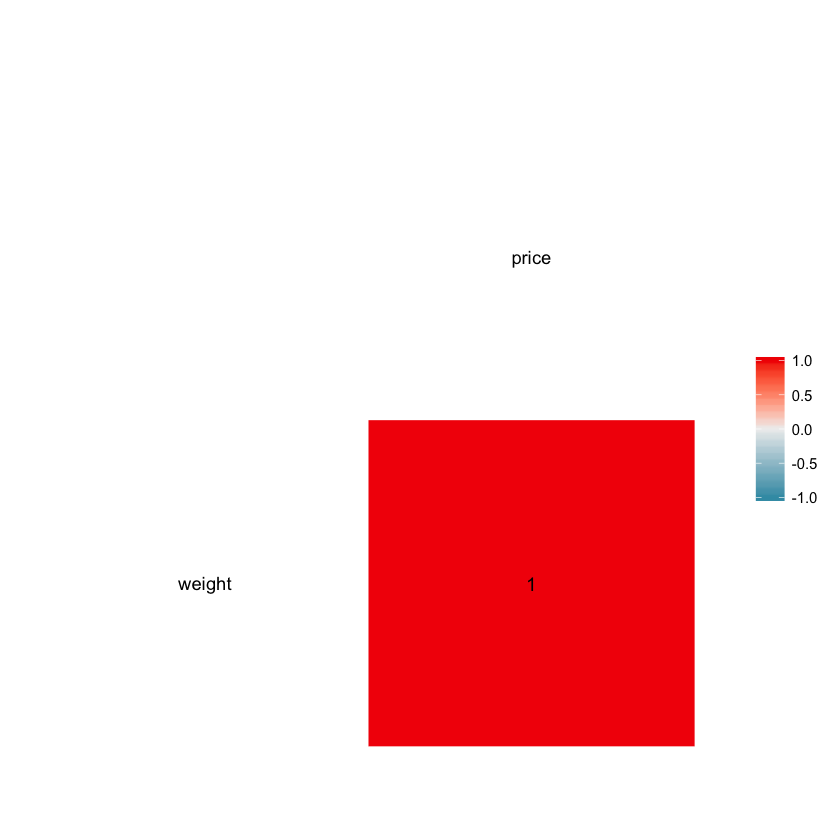

In [65]:
# Just for fun: we could also use ggcorr fuction to calculate correlation coefficient. 
# This is very useful if we have large data sets and number of variables are also large.
library(GGally)
ggcorr(Example_data, label = TRUE)

#### They have very good correlation.

### Now build a linear model

In [49]:
# Build a linear model
model <- lm(price ~ weight, data=Example_data)

# Get some information about the model
summary(model)
model


Call:
lm(formula = price ~ weight, data = Example_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.369  -5.932  -2.376   3.682  15.375 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.3660     5.4891  -0.431    0.676    
weight       10.7489     0.6156  17.460 8.06e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.083 on 10 degrees of freedom
Multiple R-squared:  0.9682,	Adjusted R-squared:  0.9651 
F-statistic: 304.9 on 1 and 10 DF,  p-value: 8.061e-09



Call:
lm(formula = price ~ weight, data = Example_data)

Coefficients:
(Intercept)       weight  
     -2.366       10.749  


#### What above summary says? 

Residual is the difference between the actual data value and the value predicted by the linear model. It is calculated for every data sample. As it wouldn't be convenient to visualize all residuals, what we see above is a summary containing the Min, 1Q, Median, 3Q and Max values. 

Residual standard error: it's a measure of the model’s accuracy. In our model, the error is 9.083 on 10 degrees of freedom, which is a very good result. “Degrees of freedom” are defined as the difference between the number of observations in the sample and the number of variables in the model (12 minus 2 variables = 10). 

Multiple R-squared: This is a statistical measure of how closely the regression line fits the data. Numerically, it’s the percentage of the response (dependent) variable’s variation that is explained by the independent variables. Generally, good models have high values. However, a high R-squared value alone cannot justify the model. 

The last item in the output is the p-value, which tests the fit of the null hypothesis to our data. The null hypothesis assumes that there is no relationship between the independent and dependent variables in the model. The p-value represents the probability you will obtain a result equal to or more extreme than what was actually observed, if the null hypothesis is true. Generally, if the p-value is very low (below 0.05), it meets threshold to reject the null hypothesis. 

Here, the p-value is less than 0.05. We conclude that there is a significant relationship between Weight and Price.

#### Lets plot the model and our data together

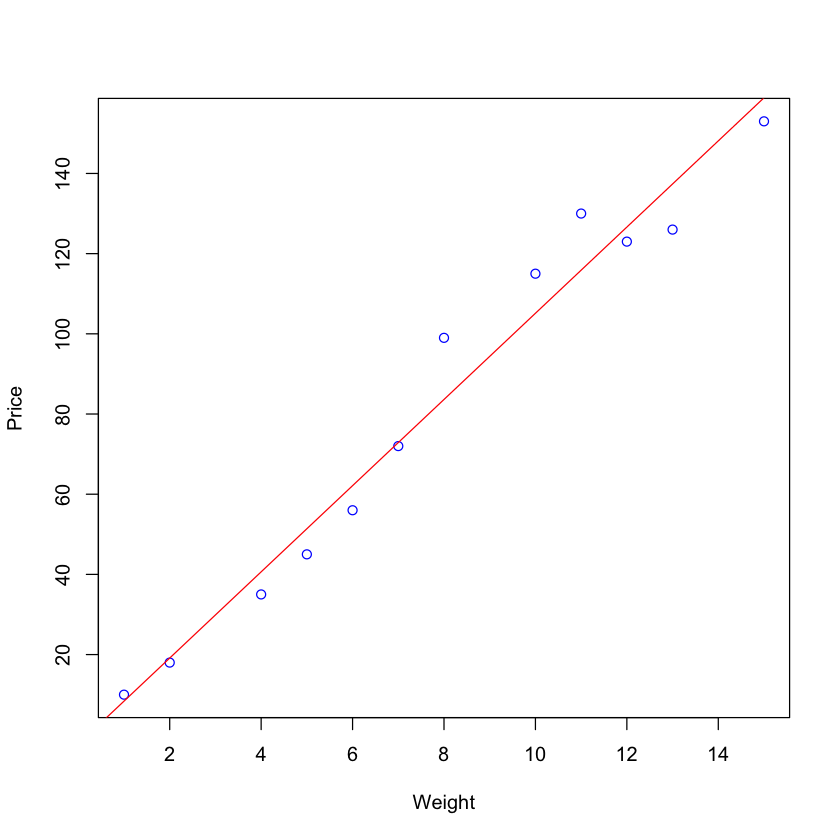

In [54]:
plot(Example_data$weight, Example_data$price, xlab = "Weight",
     ylab = "Price", col = "blue")
abline(model, col = "red")

#### Lets use the model for Predictions
We can use the model that we created to predict the value that isn't in the dataset. For this, we can use the function predict() and our linear model.
It is interesting to know that predict has a way of calculating the confidence in its own prediction. This means that you can get a 95% confidence interval for the predicted point.

In [55]:
# Here I want to see how our model predicts the price for weight 3, 9 and 16. 
#Because these weight were not in our original data set
Predictpoints <- data.frame(weight = c(3, 9, 16))
prediction <- predict(model, Predictpoints, interval = 'prediction')
prediction

,fit,lwr,upr
1,29.88055,7.79815,51.96295
2,94.37366,73.24930,115.49802
3,169.61562,145.75842,193.47282


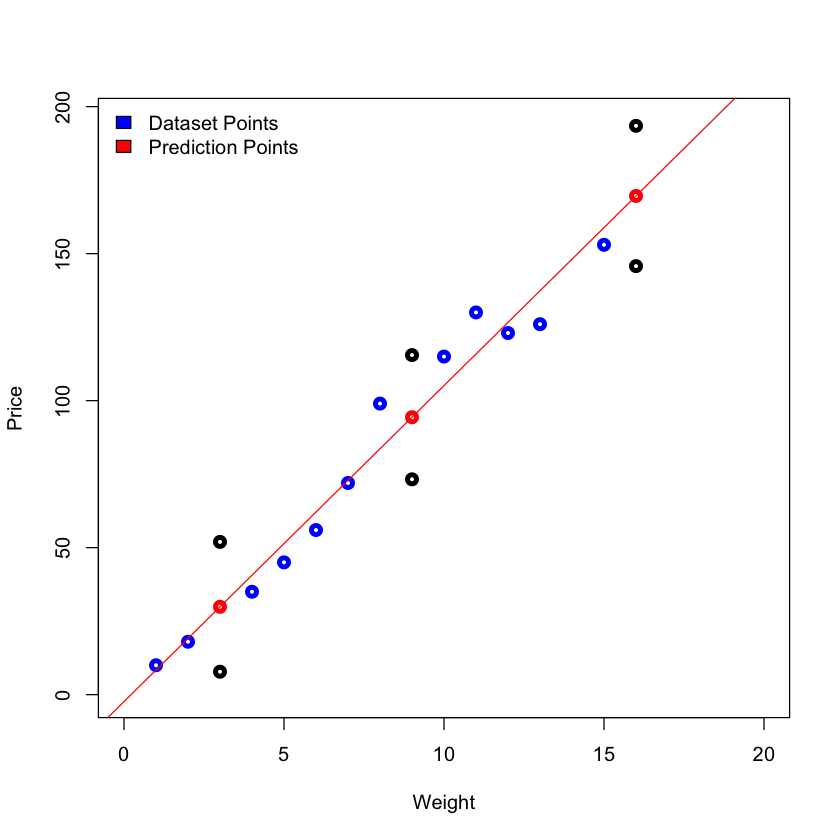

In [63]:

# Plot the previous scatter plot
plot(Example_data$weight, Example_data$price, xlab = "Weight",
     ylab = "Price", col = "blue", ylim=c(0, 195), xlim=c(0, 20), lwd = 4)
# Add the new predicted points!
points(Predictpoints$weight, prediction[,"fit"], col = "red", lwd = 4)
points(Predictpoints$weight, prediction[,"lwr"], col = "black", lwd = 4)
points(Predictpoints$weight, prediction[,"upr"], col = "black", lwd = 4)
    
legend("topleft",legend = c("Dataset Points", "Prediction Points"), fill = c("blue","red"), bty = "n")
    
# Fit a line in the plot
abline(model, col = "red")